# Scaffold analysis


projekt: demonstrace a aplikace na dataset, interpretace vysledku

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv
import gzip
import pandas as pd

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.error')

In [2]:
# load dataset
suppl = Chem.SDMolSupplier("../data/drugbank.sdf")
drug_bank = [[mol, 'drugbank'] for mol in suppl if mol]

with gzip.open("../data/actives_final.sdf.gz") as sdf:
    supp_actives = Chem.ForwardSDMolSupplier(sdf)
    actives = [[mol, 'acives'] for mol in supp_actives if mol]

with gzip.open("../data/decoys_final.sdf.gz") as sdf:
    supp_decoys = Chem.ForwardSDMolSupplier(sdf)
    decoys = [[mol, 'decoys'] for mol in supp_decoys if mol]

df_db = pd.DataFrame(drug_bank, columns=['Mol', 'Source'])
df_ac = pd.DataFrame(actives, columns=['Mol', 'Source'])
df_dc = pd.DataFrame(decoys, columns=['Mol', 'Source'])

In [3]:
df_ac

,Mol,Source
0,<rdkit.Chem.rdchem.Mol object at 0x7f7a567a9310>,acives
1,<rdkit.Chem.rdchem.Mol object at 0x7f7a567a9380>,acives
2,<rdkit.Chem.rdchem.Mol object at 0x7f7a567a93f0>,acives
3,<rdkit.Chem.rdchem.Mol object at 0x7f7a567a9460>,acives
4,<rdkit.Chem.rdchem.Mol object at 0x7f7a567a94d0>,acives
...,...,...
872,<rdkit.Chem.rdchem.Mol object at 0x7f7a567cd3f0>,acives
873,<rdkit.Chem.rdchem.Mol object at 0x7f7a567cd460>,acives
874,<rdkit.Chem.rdchem.Mol object at 0x7f7a567cd4d0>,acives
875,<rdkit.Chem.rdchem.Mol object at 0x7f7a567cd540>,acives


In [4]:
# get smiles from molecules to new column
df_db['smiles'] = df_db['Mol'].apply(Chem.MolToSmiles)
df_ac['smiles'] = df_ac['Mol'].apply(Chem.MolToSmiles)
df_dc['smiles'] = df_dc['Mol'].apply(Chem.MolToSmiles)

In [5]:
df_ac

,Mol,Source,smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7f7a567a9310>,acives,COc1cc(NC(=O)C2CC2)c(Cl)cc1C(=O)N[C@H]1CC[N@@H...
1,<rdkit.Chem.rdchem.Mol object at 0x7f7a567a9380>,acives,CC(C)(C)c1nc(N2CC[NH+](CCCCN3C(=O)CCCc4c(O)ccc...
2,<rdkit.Chem.rdchem.Mol object at 0x7f7a567a93f0>,acives,CC(C)(C)c1nc(N2CCN(CCCCN3C(=O)CCCc4c(O)cccc43)...
3,<rdkit.Chem.rdchem.Mol object at 0x7f7a567a9460>,acives,O=C(NCCCC[NH+]1CCN(C(c2ccccc2)c2ccccc2)CC1)c1c...
4,<rdkit.Chem.rdchem.Mol object at 0x7f7a567a94d0>,acives,O=C(NCCCC[NH+]1CCN([C@H](c2ccccc2)c2ccc(Cl)cc2...
...,...,...,...
872,<rdkit.Chem.rdchem.Mol object at 0x7f7a567cd3f0>,acives,COc1ccccc1N1CC[NH+](CCCCNC(=O)/C=C/c2cccc3c2OC...
873,<rdkit.Chem.rdchem.Mol object at 0x7f7a567cd460>,acives,COc1ccccc1N1CCN(CCCCNC(=O)/C=C/c2cccc3c2OCO3)CC1
874,<rdkit.Chem.rdchem.Mol object at 0x7f7a567cd4d0>,acives,c1ccc(C[NH2+]CCOc2cccc3[nH]ncc23)cc1
875,<rdkit.Chem.rdchem.Mol object at 0x7f7a567cd540>,acives,FC(F)(F)c1nc2c(OCC[NH2+]Cc3ccccc3)cccc2[nH]1


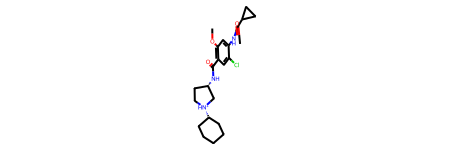

In [6]:
# show firs molecule from db_actives
df_ac.iloc[0]['Mol']

In [7]:
# compute 2d coordinates for all molecules and save to new column 'Mol2D'
for mol in df_db['Mol']:
    Chem.Compute2DCoords(mol)
df_db['Mol2D'] = df_db['Mol']

for mol in df_ac['Mol']:
    Chem.Compute2DCoords(mol)
df_ac['Mol2D'] = df_ac['Mol']

for mol in df_dc['Mol']:
    Chem.Compute2DCoords(mol)
df_dc['Mol2D'] = df_dc['Mol']


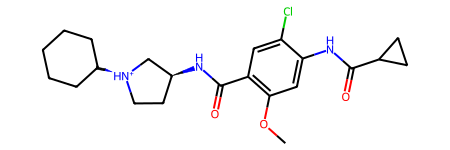

In [8]:
# show first molecule from db_actives
df_ac.iloc[0]['Mol2D']

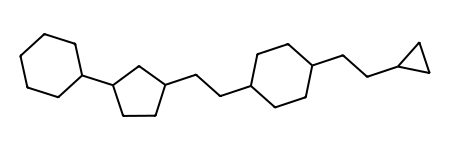

In [9]:
# calculate scaffolds for 1st molecule in db_actives
from rdkit.Chem.Scaffolds import MurckoScaffold
scaffold1 = MurckoScaffold.GetScaffoldForMol(df_ac.iloc[0]['Mol2D'])
scaffold1 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
scaffold1 = MurckoScaffold.GetScaffoldForMol(scaffold1)
scaffold1



In [19]:
# create function for scaffold calculation return smiles
def get_scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) # get rid of stereo, doesn't matter much in scaffolds
    Chem.Compute2DCoords(mol)
    try:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        scaffold = MurckoScaffold.MakeScaffoldGeneric(scaffold)
        scaffold = MurckoScaffold.GetScaffoldForMol(scaffold)
        scaffold = Chem.MolToSmiles(scaffold)
    except ValueError:
        scaffold = ""
    return scaffold

In [13]:
# calculate scaffolds for all molecules in df using smiles
#df_ac['Scaffold'] = df_ac['smiles'].apply(Chem.MolFromSmiles).apply(get_scaffold)
#df_dc['Scaffold'] = df_dc['smiles'].apply(Chem.MolFromSmiles).apply(get_scaffold)
#df_db['Scaffold'] = df_db['smiles'].apply(Chem.MolFromSmiles).apply(get_scaffold)

In [21]:
df_ac['Scaffold_smiles'] = df_ac['Mol'].apply(get_scaffold)
df_dc['Scaffold_smiles'] = df_dc['Mol'].apply(get_scaffold)
df_db['Scaffold_smiles'] = df_db['Mol'].apply(get_scaffold)

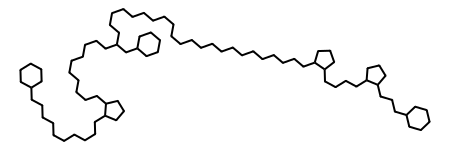

In [23]:
# show first molecule from df_db
df_db.iloc[0]['Scaffold']